# Libraries

   **To see the detailed explanation of the notebook and below processes, I highly suggest you to visit the following Medium link: https://medium.com/@bauglir/credit-score-prediction-with-multi-model-ensemble-voting-classifier-80-accuracy-b091f929ad40**

In [183]:
from pandas_datareader import data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
from lazypredict.Supervised import LazyClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as mnso
import re
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
credit_quality_test = pd.read_csv("../credit_quality_test.csv")
credit_quality_train = pd.read_csv("../credit_quality_train.csv")

# Data Description Table

| Variable Name | Description|
|-------------|----------------|
|ID| Unique ID of the record|
|Customer_ID | Unique ID of the customer|
|Month | Month of the year|
|Name| The name of the person|
|Age | The age of the person|
|SSN | Social Security Number of the person|
|Occupation | The occupation of the person|
|Annual_Income | The Annual Income of the person|
|Monthly_Inhand_Salary | Monthly in-hand salary of the person|
|Num_Bank_Accounts | The number of bank accounts of the person|
|Num_Credit_Card | Number of credit cards the person is having|
|Interest_Rate | The interest rate on the credit card of the person|
|Num_of_Loan | The number of loans taken by the person from the bank|
|Type_of_Loan | The types of loans taken by the person from the bank|
|Delay_from_due_date | The average number of days delayed by the person from the date of payment|
|Num_of_Delayed_Payment | Number of payments delayed by the person|
|Changed_Credit_Card | The percentage change in the credit card limit of the person|
|Num_Credit_Inquiries | The number of credit card inquiries by the person|
|Credit_Mix | Classification of Credit Mix of the customer|
|Outstanding_Debt | The outstanding balance of the person|
|Credit_Utilization_Ratio | The credit utilization ratio of the credit card of the customer|
|Credit_History_Age | The age of the credit history of the person|
|Payment_of_Min_Amount | Yes if the person paid the minimum amount to be paid only, otherwise no.|
|Total_EMI_per_month | The total EMI per month of the person|
|Amount_invested_monthly | The monthly amount invested by the person|
|Payment_Behaviour | The payment behaviour of the person|
|Monthly_Balance | The monthly balance left in the account of the person|
|Credit_Score | The credit score of the person|

# Exploratory Data Analysis and Cleaning

In [227]:
credit_quality_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.00,93020.00,84998.00,100000.00,100000.00,100000.00,95215.00,100000.00,97256.00,97909.00,98035.00,100000.00,100000.00,100000.00,100000.00,91216.00,98791.00
mean,110.93,178578.96,4194.17,17.09,22.47,72.47,2.78,21.07,28.80,10.39,27.75,32.29,201.22,0.52,1403.12,195.54,402.55
std,689.41,1442878.39,3183.69,117.40,129.06,466.42,62.50,14.86,218.78,6.79,193.18,5.12,114.32,0.50,8306.04,199.56,213.93
min,-500.00,7005.93,303.65,-1.00,0.00,1.00,-100.00,-5.00,-3.00,-6.49,0.00,20.00,0.00,0.00,0.00,0.00,0.01
25%,24.00,19435.60,1625.57,3.00,4.00,8.00,1.00,10.00,8.00,5.32,3.00,28.05,114.00,0.00,30.31,72.24,270.11
50%,33.00,37550.74,3093.74,6.00,5.00,13.00,3.00,18.00,13.00,9.40,6.00,32.31,208.00,1.00,69.25,128.95,336.73
75%,42.00,72843.38,5957.45,7.00,7.00,20.00,5.00,28.00,18.00,14.87,9.00,36.50,292.00,1.00,161.22,236.82,470.26
max,8698.00,24198062.00,15204.63,1798.00,1499.00,5797.00,1496.00,67.00,4397.00,36.97,2597.00,50.00,404.00,1.00,82331.00,1977.33,1602.04


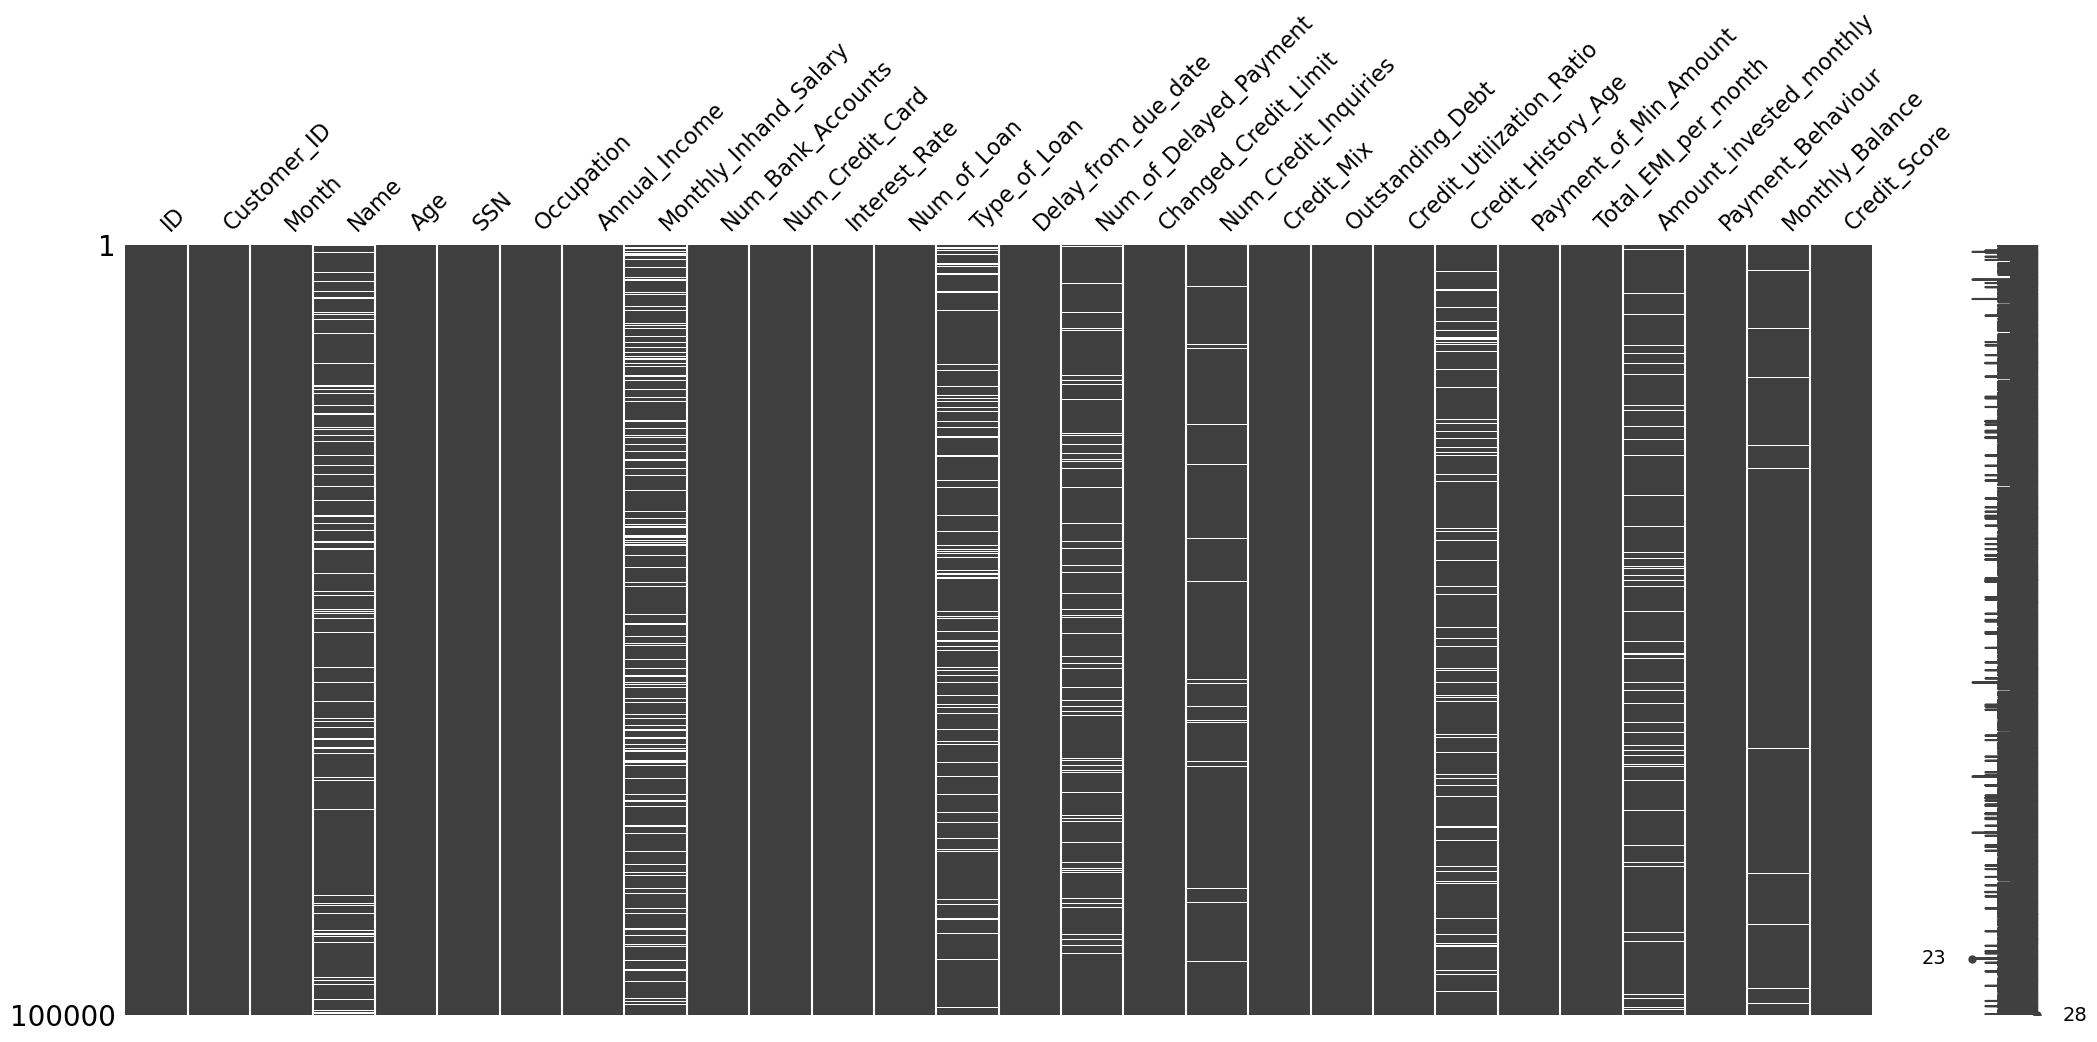

In [4]:
mnso.matrix(credit_quality_train)
plt.show()

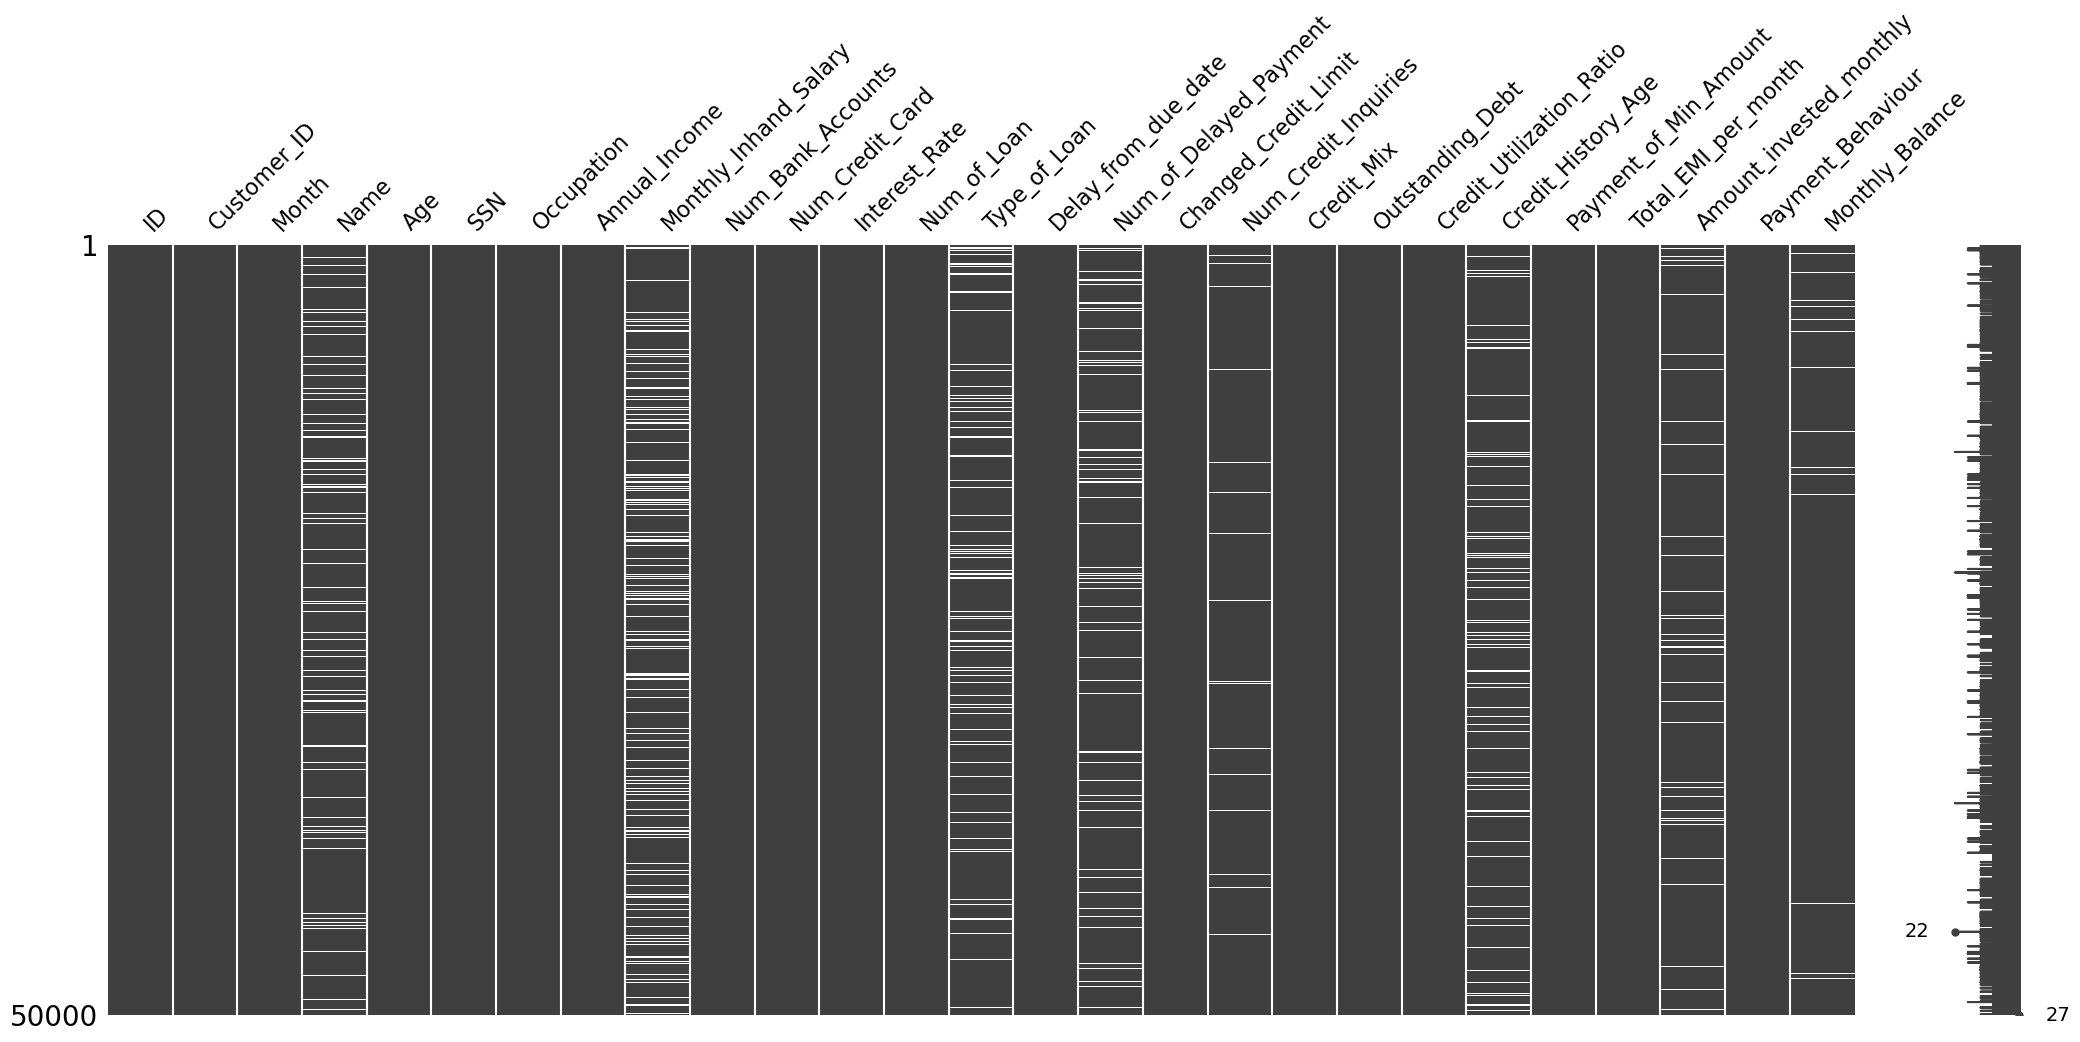

In [5]:
mnso.matrix(credit_quality_test)
plt.show()

## Missing Value Counts

|Variable| Missing Value Count(Test)| Missing Value Count(Train)|
|--------|-------------------|------|
|Monthly_Balance              |   562| 1200|  
|Num_Credit_Inquiries         | 1035| 1965|
|Amount_invested_monthly      | 2271| 4479|
|Num_of_Delayed_Payment       | 3498| 7002|
|Credit_History_Age           | 4470| 9030|
|Name                         | 5015| 9985|
|Type_of_Loan | 5704| 11408|
|Monthly_Inhand_Salary        | 7498| 15002|

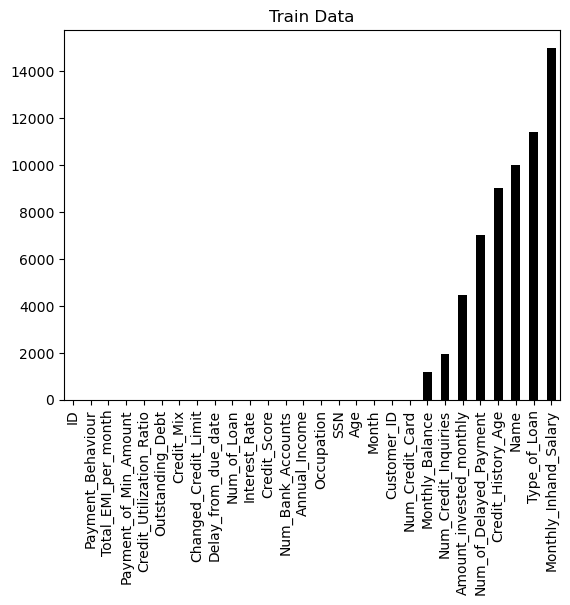

In [6]:
credit_quality_train.isnull().sum().sort_values().plot(kind="bar",color="black")
plt.title("Train Data")
plt.show()

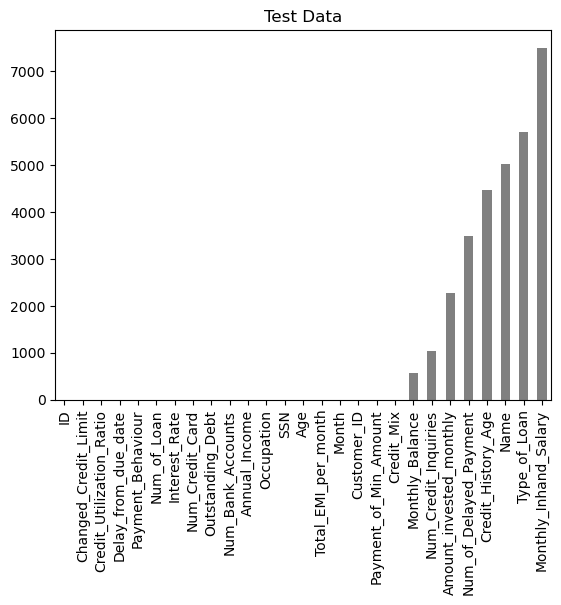

In [7]:
credit_quality_test.isnull().sum().sort_values().plot(kind="bar",color="grey")
plt.title("Test Data")
plt.show()

# Methodology For Treating Missing / Mislabelled Values

In [8]:
train = credit_quality_train
test = credit_quality_test

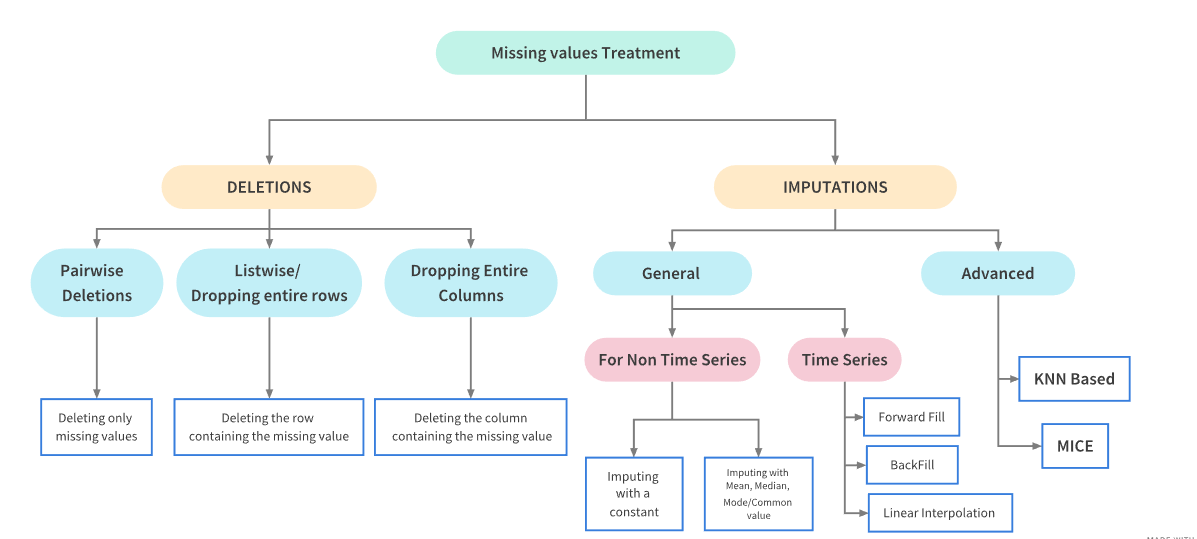

   - Missing 'Name' values are dropped, since no metholody can make up for that, and afterwards the remanining numerical and categorical values are interpolated with their corresponding mean values
  
  
  - "Payment_of_Min_Amount" variable contains 'Yes', 'No', and 'NM' values. However, since the variable description mentions only two variable, which are 'Yes' and 'No', the "NM" value is most likely to be mislabelled. Thus, "NM" is replaced with "No".
  
  
  - Data types are changed in an accordance with the nature of the variable. For example, if a numerical variable is loaded as object, it will be converted to corresponding numerical type, logically   
   
   
  - String values inside 'Credit_History_Age' column (such as 'Years', 'and', 'Month') are removed from numerical variables. To illustrate, '22 Years and 5 Months' (str) is converted to total years + months, as 22*12 + 5 (float).


  - Missing 'Occupation' data is changed to Unemployed, since the previous value was '_ _ _ _ _ _ _ _'
  
  
  - Categorical values are dummified as 0 or 1 

 ##  **Data Type Correction for Test data** 

In [9]:
def calc_age_in_months(val):
    
    # If NaN, return NaN
    if val != val:
        return val
    # Extract numeric values using regex
    pattern = re.compile(r'\d+')
    digits = pattern.findall(val)
    # Convert to integer and perform calculation
    result = int(digits[0]) * 12 + int(digits[1])
    return result

# Apply the function to the column
test['Credit_History_Age'] = test['Credit_History_Age'].apply(calc_age_in_months)

In [10]:
def clean_outliers(data, column_name:str):
    
    
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    data = data.drop(data.loc[data[column_name] > (Q3 + 1.5 * IQR)].index)
    data = data.drop(data.loc[data[column_name] < (Q1 - 1.5 * IQR)].index)
    
    return data

In [11]:
test['Credit_History_Age'] = test['Credit_History_Age'].fillna(0)
test['Credit_History_Age'] = test['Credit_History_Age'].astype(int)

In [12]:
test["Payment_of_Min_Amount"].value_counts()

Yes    26158
No     17849
NM      5993
Name: Payment_of_Min_Amount, dtype: int64

In [13]:
test["Payment_of_Min_Amount"] = test["Payment_of_Min_Amount"].str.replace("M","o")
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].str.replace("M","o")

In [14]:
test["Payment_of_Min_Amount"].value_counts()

Yes    26158
No     23842
Name: Payment_of_Min_Amount, dtype: int64

In [15]:
test["Changed_Credit_Limit"] = test["Changed_Credit_Limit"].replace("_","")
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].replace("_","")
test["Num_of_Loan"] = test["Num_of_Loan"].replace("_","")
test["Age"] = test["Age"].replace("_","")
test["Annual_Income"] = test["Annual_Income"].replace("_","")
test["Outstanding_Debt"] = test["Outstanding_Debt"].str.replace("_","")
test["Amount_invested_monthly"] = test["Amount_invested_monthly"].replace("_","")
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].fillna(0)

In [16]:
test["Credit_History_Age"] = test["Credit_History_Age"].astype(float)
test['Annual_Income'] = pd.to_numeric(test['Annual_Income'], errors='coerce')
test['Age'] = pd.to_numeric(test['Age'], errors='coerce')
test["Num_Bank_Accounts"] = test["Num_Bank_Accounts"].astype(int)
test["Num_of_Loan"] = pd.to_numeric(test['Num_of_Loan'], errors='coerce')
test["Num_of_Delayed_Payment"] = pd.to_numeric(test['Num_of_Delayed_Payment'], errors='coerce')
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors='coerce')
test['Amount_invested_monthly'] = pd.to_numeric(test['Amount_invested_monthly'], errors='coerce')
test['Monthly_Balance'] = pd.to_numeric(test['Monthly_Balance'], errors='coerce')

In [17]:
test["Occupation"] = test["Occupation"].replace("_______", "Unemployed")
test["Credit_Mix"] = test["Credit_Mix"].replace("_", "Uncategorized") # mark it as "uncategorized"
test["Payment_Behaviour"] = test["Payment_Behaviour"].replace("!@9#%8", "Uncategorized") # mark ''!@9#%8' as "uncategorized"

In [18]:
test["Payment_of_Min_Amount"] = test["Payment_of_Min_Amount"].replace("No",0)
test["Payment_of_Min_Amount"] = test["Payment_of_Min_Amount"].replace("Yes",1)

In [19]:
test = test.replace({'Credit_Mix' : { 'Uncategorized' : 0, 'Low_spent_Small_value_payments' : 1, 
                              'Low_spent_Medium_value_payments' : 2 , "Low_spent_Large_value_payments":3,
                              "High_spent_Small_value_payments":4,"High_spent_Medium_value_payments":5,
                             "High_spent_Large_value_payments":6}})

test = test.replace({'Payment_Behaviour' : { 'Uncategorized' : 0, 'Low_spent_Small_value_payments' : 1, 
                              'Low_spent_Medium_value_payments' : 2 , "Low_spent_Large_value_payments":3,
                              "High_spent_Small_value_payments":4,"High_spent_Medium_value_payments":5,
                             "High_spent_Large_value_payments":6}})

In [20]:
test = clean_outliers(test, "Num_Bank_Accounts")
test = clean_outliers(test, "Num_Credit_Card")
test = clean_outliers(test, "Interest_Rate")
test = clean_outliers(test, "Num_of_Loan")
test = clean_outliers(test, "Delay_from_due_date")
test = clean_outliers(test, "Num_of_Delayed_Payment")
test = clean_outliers(test, "Num_Credit_Inquiries")
test = clean_outliers(test, "Total_EMI_per_month")

 ##  **Data Type Correction for Train data** 

In [21]:
def calc_age_in_months(val):
    # If NaN, return NaN
    if val != val:
        return val
    # Extract numeric values using regex
    pattern = re.compile(r'\d+')
    digits = pattern.findall(val)
    # Convert to integer and perform calculation
    result = int(digits[0]) * 12 + int(digits[1])
    return result

# Apply the function to the column
train['Credit_History_Age'] = train['Credit_History_Age'].apply(calc_age_in_months)

In [22]:
def clean_outliers(data, column_name:str):
    
    
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    data = data.drop(data.loc[data[column_name] > (Q3 + 1.5 * IQR)].index)
    data = data.drop(data.loc[data[column_name] < (Q1 - 1.5 * IQR)].index)
    
    return data

In [23]:
train["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [24]:
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].str.replace("M","o")
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].str.replace("M","o")


In [25]:
train["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [26]:
train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].replace("_","")
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].replace("_","")
train["Num_of_Loan"] = train["Num_of_Loan"].replace("_","")
train["Age"] = train["Age"].replace("_","")
train["Annual_Income"] = train["Annual_Income"].replace("_","")
train["Amount_invested_monthly"] = train["Amount_invested_monthly"].replace("_","")
train["Outstanding_Debt"] = train["Outstanding_Debt"].str.replace("_","")
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].fillna(0)
train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].fillna(0)
train["Credit_History_Age"] = train["Credit_History_Age"].fillna(0)

In [27]:
train["Credit_History_Age"] = train["Credit_History_Age"].astype(float)
train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
train["Num_Bank_Accounts"] = train["Num_Bank_Accounts"].astype(int)
train["Num_of_Loan"] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train["Num_of_Delayed_Payment"] = pd.to_numeric(train['Num_of_Delayed_Payment'], errors='coerce')
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')

In [28]:
train["Occupation"] = train["Occupation"].replace("_______", "Unemployed")
train["Credit_Mix"] = train["Credit_Mix"].replace("_", "Uncategorized")
train["Payment_Behaviour"] = train["Payment_Behaviour"].str.replace("!@9#%8", "Uncategorized") # mark ''!@9#%8' as "uncategorized"

In [29]:
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].replace("No",0)
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].replace("Yes",1)

In [30]:
train = train.replace({'Credit_Mix' : { 'Uncategorized' : 0, 'Low_spent_Small_value_payments' : 1, 
                              'Low_spent_Medium_value_payments' : 2 , "Low_spent_Large_value_payments":3,
                              "High_spent_Small_value_payments":4,"High_spent_Medium_value_payments":5,
                             "High_spent_Large_value_payments":6, "0":7}})

train = train.replace({'Payment_Behaviour' : { 'Uncategorized' : 0, 'Low_spent_Small_value_payments' : 1, 
                              'Low_spent_Medium_value_payments' : 2 , "Low_spent_Large_value_payments":3,
                              "High_spent_Small_value_payments":4,"High_spent_Medium_value_payments":5,
                             "High_spent_Large_value_payments":6}})

In [31]:
train = clean_outliers(train, "Num_Bank_Accounts")
train = clean_outliers(train, "Num_Credit_Card")
train = clean_outliers(train, "Interest_Rate")
train = clean_outliers(train, "Num_of_Loan")
train = clean_outliers(train, "Delay_from_due_date")
train = clean_outliers(train, "Num_of_Delayed_Payment")
train = clean_outliers(train, "Num_Credit_Inquiries")
train = clean_outliers(train, "Total_EMI_per_month")

 ## **Missing Value Interpolation For Test Data**

In [32]:
# Check if the column has any missing or negative values
if train["Annual_Income"].isnull().sum() > 0 or (train["Annual_Income"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Annual_Income"].mean()
    train["Annual_Income"] = train["Annual_Income"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)

# Check if the column has any missing or negative values
if train["Monthly_Inhand_Salary"].isnull().sum() > 0 or (train["Monthly_Inhand_Salary"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Monthly_Inhand_Salary"].mean()
    train["Monthly_Inhand_Salary"] = train["Monthly_Inhand_Salary"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Num_of_Loan"].isnull().sum() > 0 or (train["Num_of_Loan"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Num_of_Loan"].mean()
    train["Num_of_Loan"] = train["Num_of_Loan"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Num_of_Delayed_Payment"].isnull().sum() > 0 or (train["Num_of_Delayed_Payment"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Num_of_Delayed_Payment"].mean()
    train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Changed_Credit_Limit"].isnull().sum() > 0 or (train["Changed_Credit_Limit"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Changed_Credit_Limit"].mean()
    train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Num_Credit_Inquiries"].isnull().sum() > 0 or (train["Num_Credit_Inquiries"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Num_Credit_Inquiries"].mean()
    train["Num_Credit_Inquiries"] = train["Num_Credit_Inquiries"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Credit_History_Age"].isnull().sum() > 0 or (train["Credit_History_Age"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Credit_History_Age"].mean()
    train["Credit_History_Age"] = train["Credit_History_Age"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Amount_invested_monthly"].isnull().sum() > 0 or (train["Amount_invested_monthly"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Amount_invested_monthly"].mean()
    train["Amount_invested_monthly"] = train["Amount_invested_monthly"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if train["Monthly_Balance"].isnull().sum() > 0 or (train["Monthly_Balance"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = train["Monthly_Balance"].mean()
    train["Monthly_Balance"] = train["Monthly_Balance"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)

In [33]:
# Check if the column has any missing or negative values
if test["Annual_Income"].isnull().sum() > 0 or (test["Annual_Income"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Annual_Income"].mean()
    test["Annual_Income"] = test["Annual_Income"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)

# Check if the column has any missing or negative values
if test["Monthly_Inhand_Salary"].isnull().sum() > 0 or (test["Monthly_Inhand_Salary"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Monthly_Inhand_Salary"].mean()
    test["Monthly_Inhand_Salary"] = test["Monthly_Inhand_Salary"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Num_of_Loan"].isnull().sum() > 0 or (test["Num_of_Loan"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Num_of_Loan"].mean()
    test["Num_of_Loan"] = test["Num_of_Loan"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Num_of_Delayed_Payment"].isnull().sum() > 0 or (test["Num_of_Delayed_Payment"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Num_of_Delayed_Payment"].mean()
    test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Changed_Credit_Limit"].isnull().sum() > 0 or (test["Changed_Credit_Limit"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Changed_Credit_Limit"].mean()
    test["Changed_Credit_Limit"] = test["Changed_Credit_Limit"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Num_Credit_Inquiries"].isnull().sum() > 0 or (test["Num_Credit_Inquiries"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Num_Credit_Inquiries"].mean()
    test["Num_Credit_Inquiries"] = test["Num_Credit_Inquiries"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Credit_History_Age"].isnull().sum() > 0 or (test["Credit_History_Age"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Credit_History_Age"].mean()
    test["Credit_History_Age"] = test["Credit_History_Age"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Amount_invested_monthly"].isnull().sum() > 0 or (test["Amount_invested_monthly"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Amount_invested_monthly"].mean()
    test["Amount_invested_monthly"] = test["Amount_invested_monthly"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)


# Check if the column has any missing or negative values
if test["Monthly_Balance"].isnull().sum() > 0 or (test["Monthly_Balance"] < 0).sum() > 0:
    # Replace missing values and negative values with column mean
    col_mean = test["Monthly_Balance"].mean()
    test["Monthly_Balance"] = test["Monthly_Balance"].apply(lambda x: col_mean if pd.isnull(x) or x < 0 else x)

# Data Preparation

In [34]:
test = test.drop(["ID","Customer_ID","Month","Name","Age","SSN","Type_of_Loan","Credit_Mix"],axis=1)
train = train.drop(["ID","Customer_ID","Month","Name","Age","SSN","Type_of_Loan","Credit_Mix"],axis=1)

In [35]:
train.shape, test.shape

((78256, 20), (38938, 19))

In [36]:
y = train["Credit_Score"]
X = train
del train["Credit_Score"]

In [37]:
X = X.replace({'Occupation' : { 'Unemployed' : 0, 'Lawyer' : 1, 
                              'Architect' : 2 , "Engineer":3,
                              "Scientist":4,"Journalist":5,
                             "Developer":6, "Accountant":7,
                              "Media_Manager":8, "Doctor":9,
                              "Entrepreneur":10,"Teacher":11,
                              "Writer":12,"Manager":13,
                              "Musician":14,"Mechanic":15}})

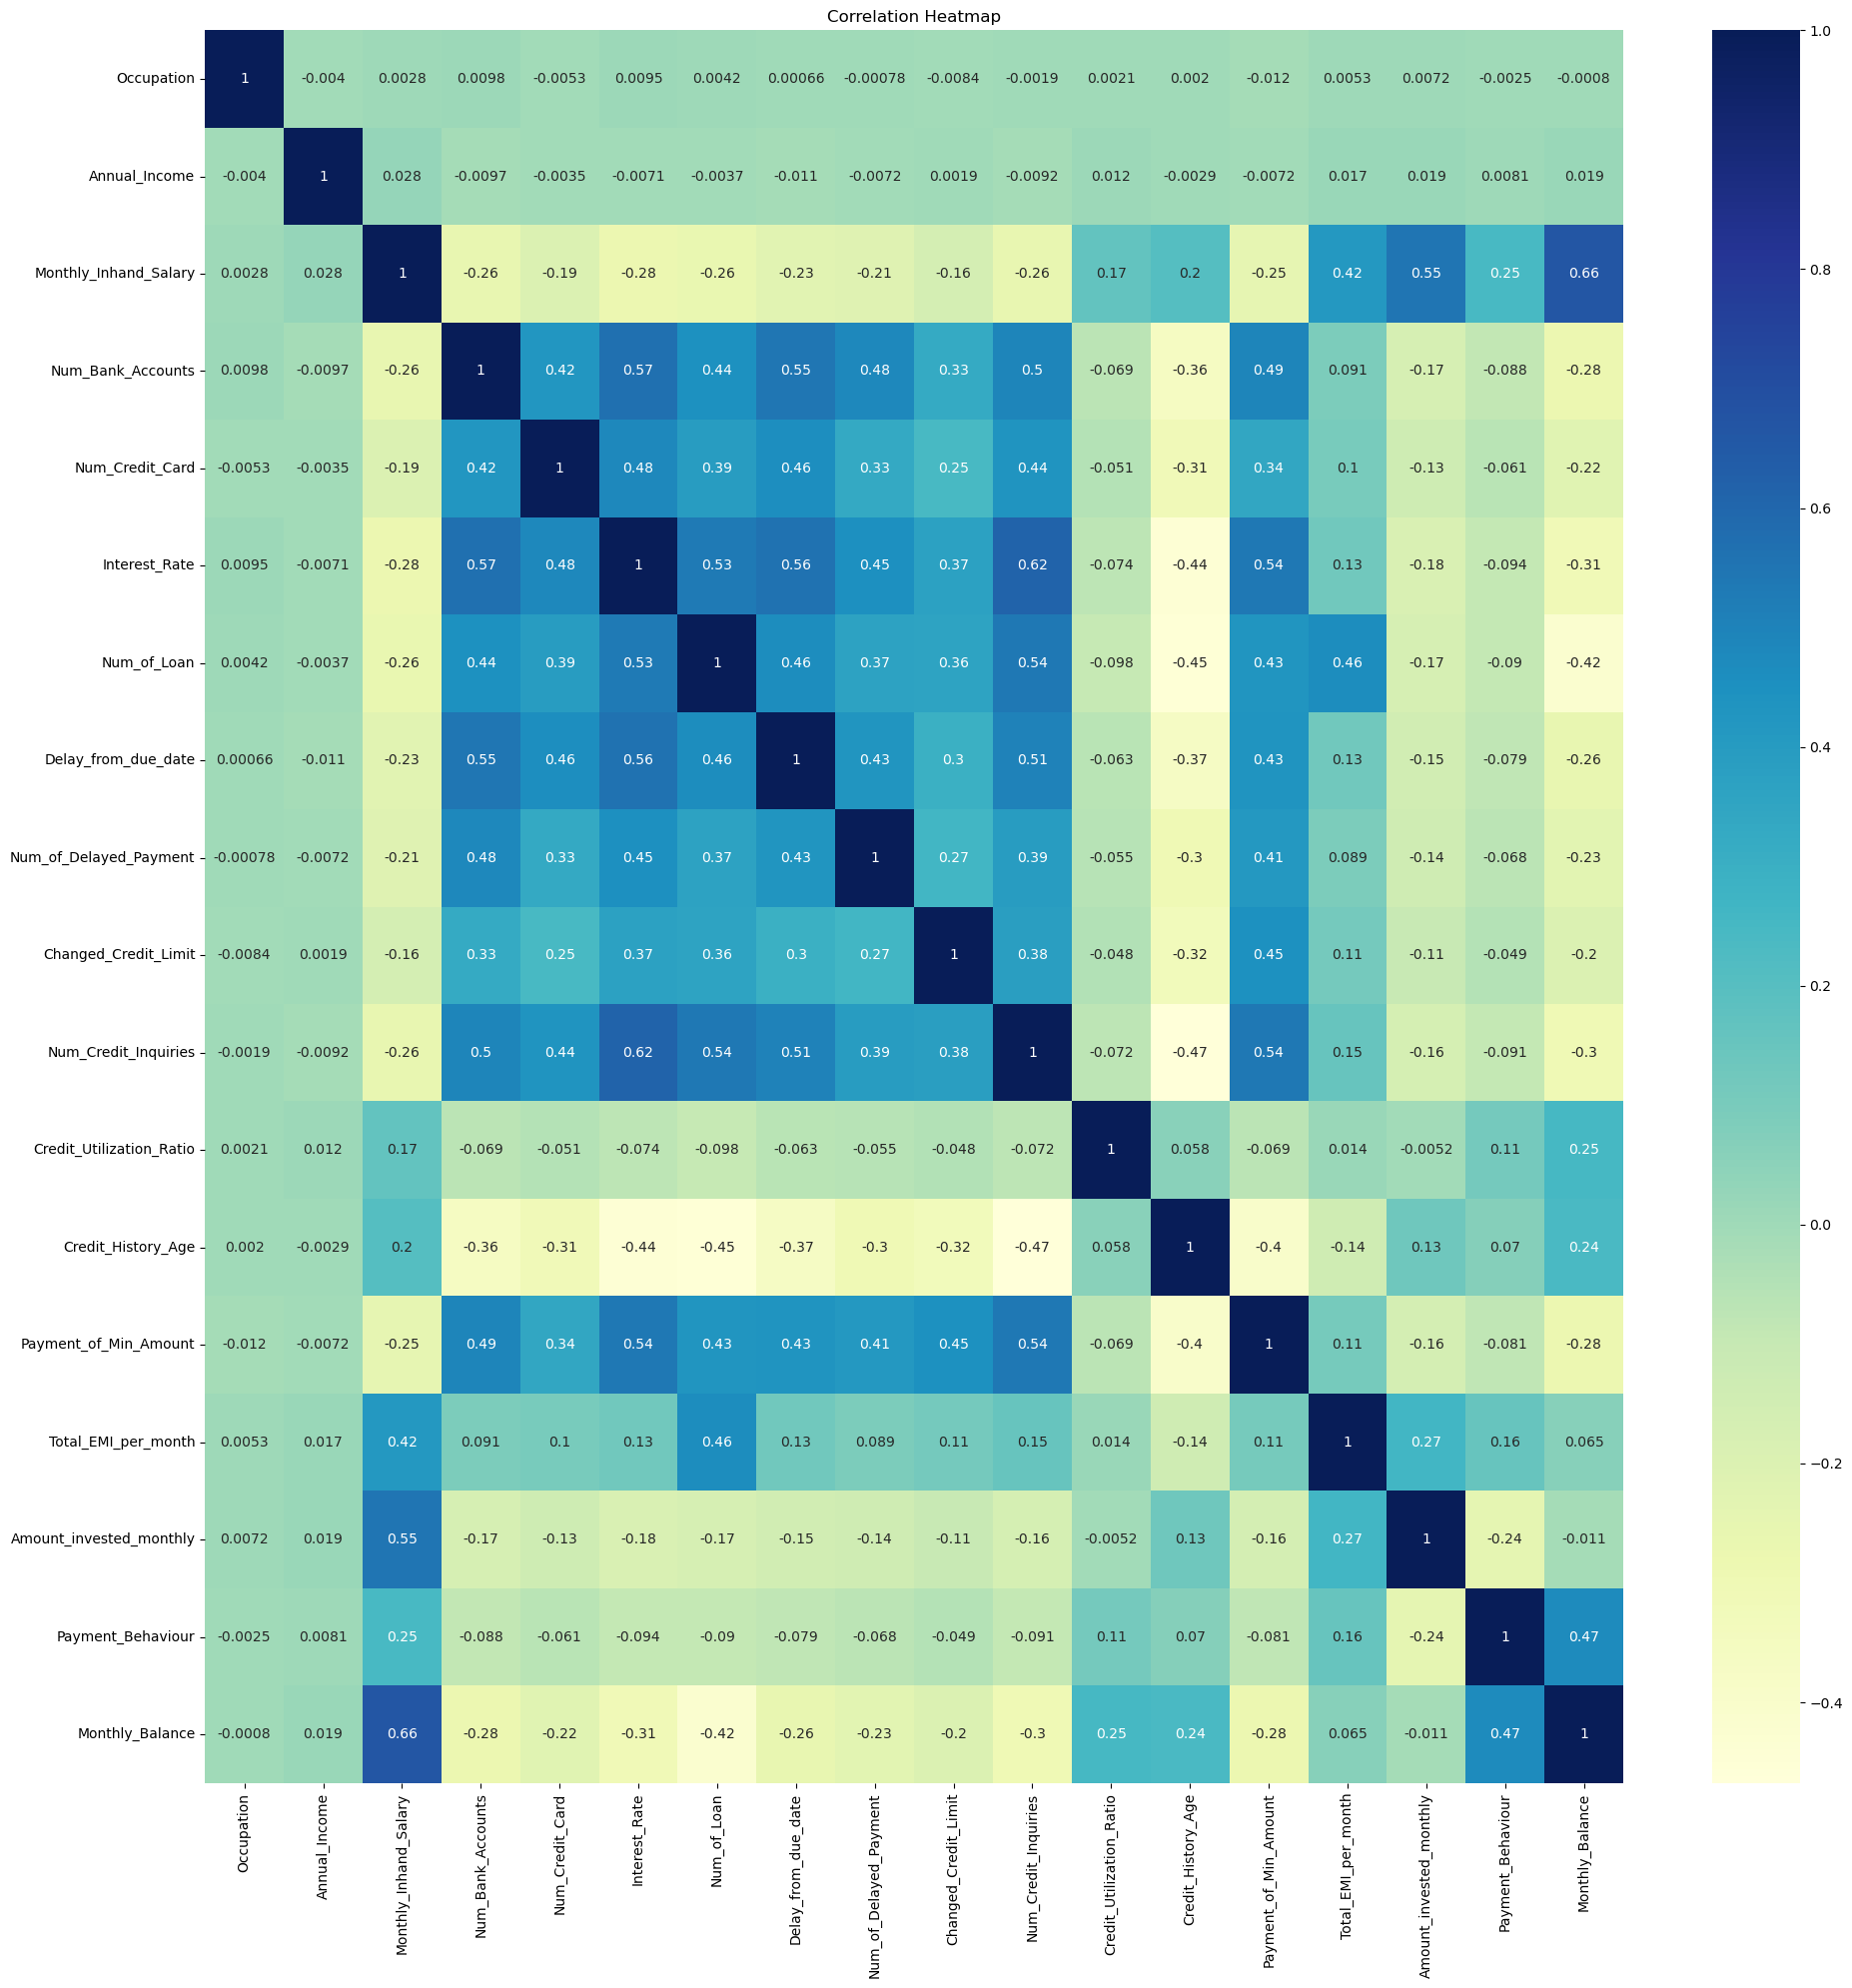

In [38]:
plt.figure(figsize = (20, 20))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.tight_layout()

## Data Integrity

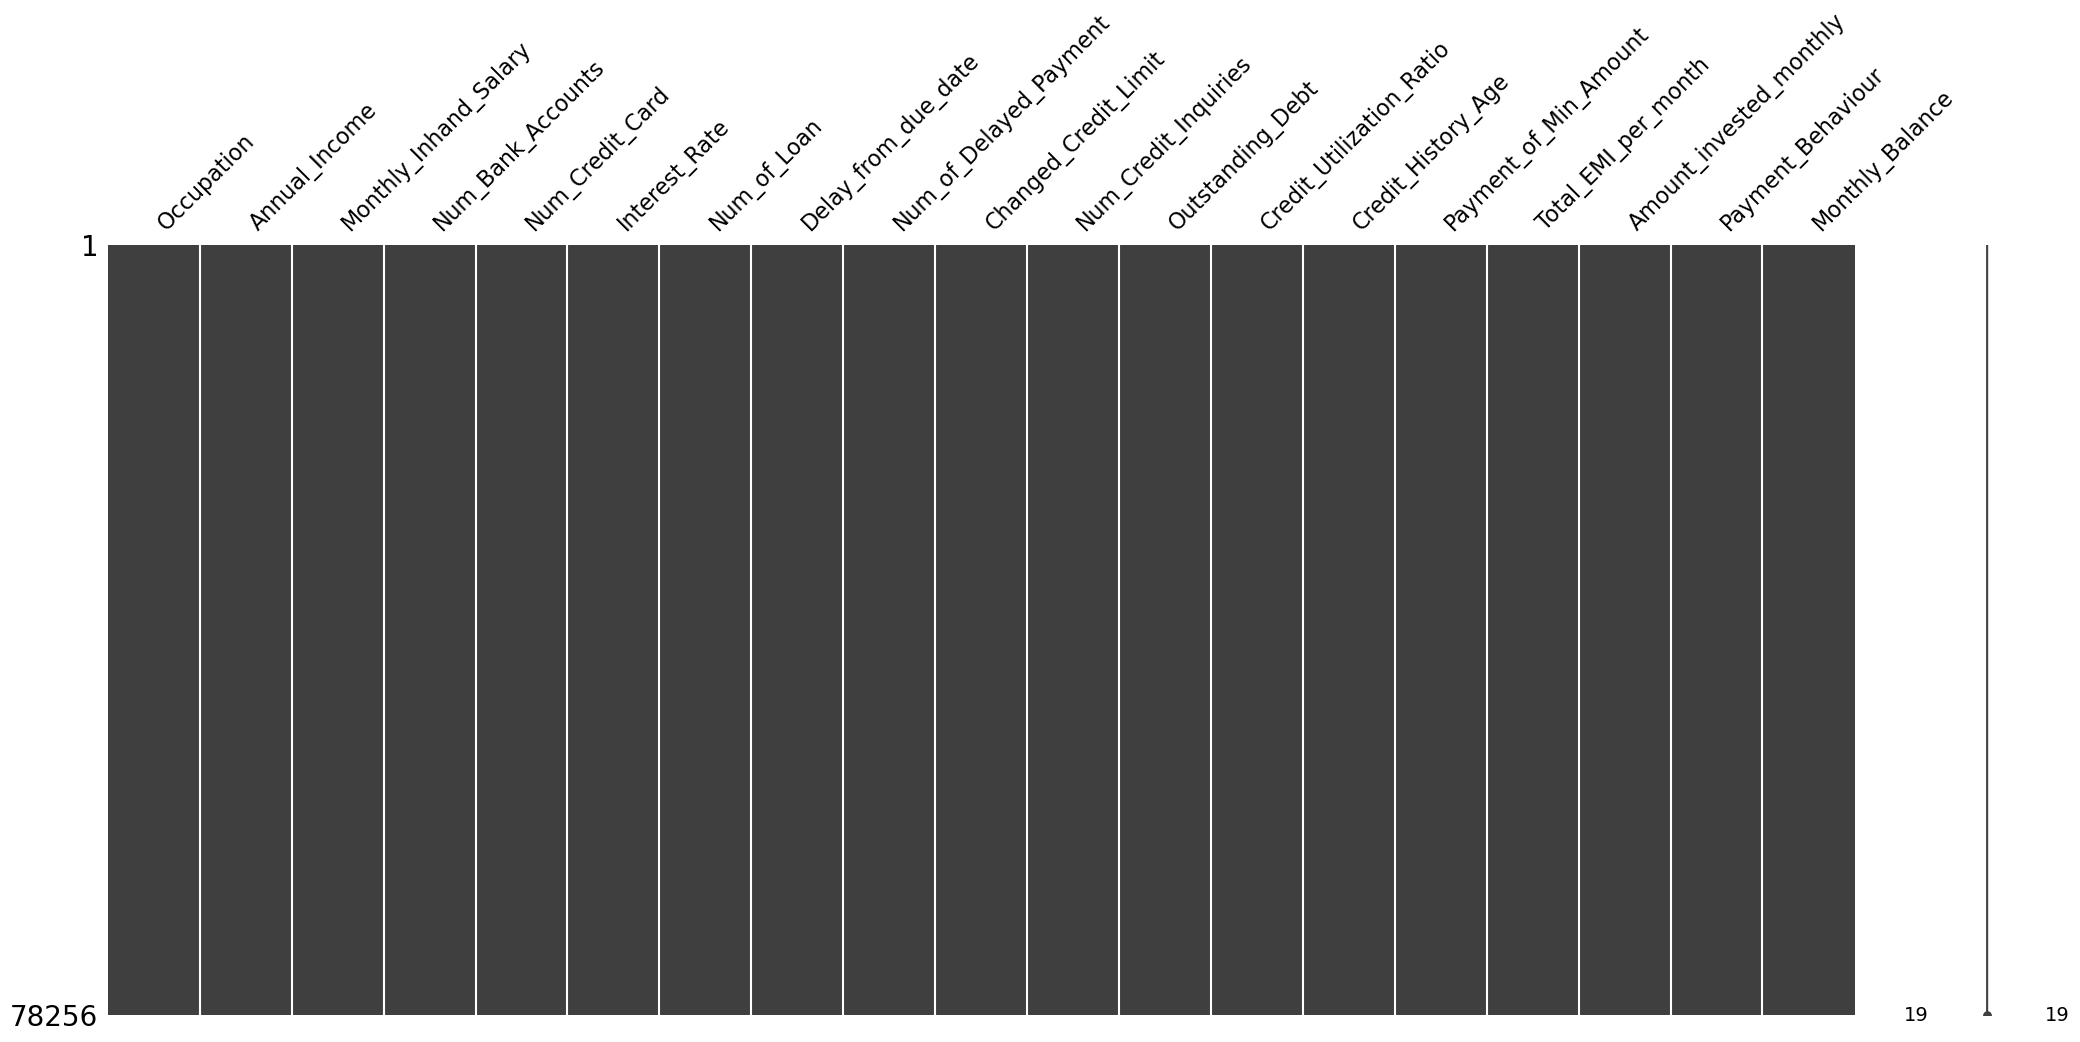

In [39]:
mnso.matrix(X)
plt.show()

# Ensembling with VotingClassifiers 

In [228]:
X.tail(5)

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
99994,15,39628.99,3359.42,4,6,7,2.00,20,6.00,9.50,3.00,502.38,39.32,377.00,0,35.10,140.58,5,410.26
99995,15,39628.99,3359.42,4,6,7,2.00,23,7.00,11.50,3.00,502.38,34.66,378.00,0,35.10,60.97,6,479.87
99996,15,39628.99,3359.42,4,6,7,2.00,18,7.00,11.50,3.00,502.38,40.57,379.00,0,35.10,54.19,5,496.65
99998,15,39628.99,3359.42,4,6,7,2.00,20,0.00,11.50,3.00,502.38,33.64,381.00,0,35.10,251.67,3,319.16
99999,15,177516.68,3359.42,4,6,7,2.00,18,6.00,11.50,3.00,502.38,34.19,382.00,0,35.10,167.16,0,393.67


In [222]:
y.head(5)

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Score, dtype: object

## Ensembling Multiple Classifiers

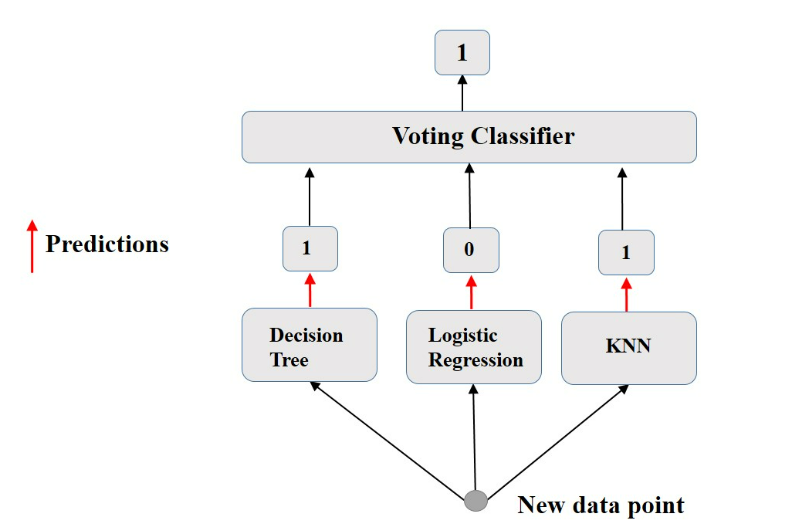

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, shuffle=True)

# Instantiate individual classifiers
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(max_depth=8, random_state=24)
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features="log2", random_state = 24)

# Define a list of classifiers that contains (classifier_name, classifier)
classifiers=[("K Nearest Neighbors", knn),
             ("Decision Tree", dt),
             ("Random Forest", rf)]

for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    # predict the labels of the test set
    y_pred = clf.predict(X_test)
    # evaluate the accuracy of clf on the test set
    print("{:s} : {:.3f}".format(clf_name, accuracy_score(y_test, y_pred)))


K Nearest Neighbors : 0.676

Decision Tree : 0.694

Random Forest : 0.789


## Setting up the VotingClassifier

In [232]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate the test-set accuracy of 'vc'
print("Voting Classifier: {}".format(round(accuracy_score(y_test, y_pred),3))) 

Voting Classifier: 0.771


## Hyperparameter Tuning For Decision Tree

In [186]:
print("Maximum Depth is : {}".format(dt.tree_.max_depth))

Maximum Depth is : 8


In [112]:
training_acc={}
test_acc={}
max_depth_range=np.arange(1,20)
for max_d in max_depth_range:
    
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    
    training_acc[max_d] = model.score(X_train, y_train)
    test_acc[max_d] = model.score(X_test, y_test)

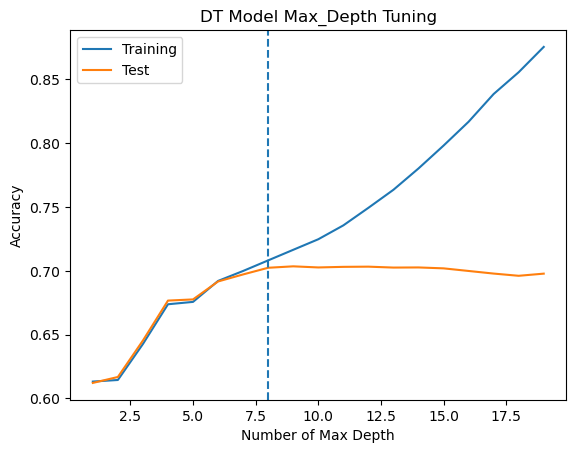

In [163]:
# visualize test and training accuracies
fig,ax=plt.subplots()
ax.plot(max_depth_range, training_acc.values(), label="Training")
ax.plot(max_depth_range, test_acc.values(), label="Test")
plt.legend(["Training","Test"])
plt.title("DT Model Max_Depth Tuning")
plt.xlabel("Number of Max Depth")
plt.ylabel("Accuracy")
plt.axvline(x=8, linestyle="--")
plt.show()

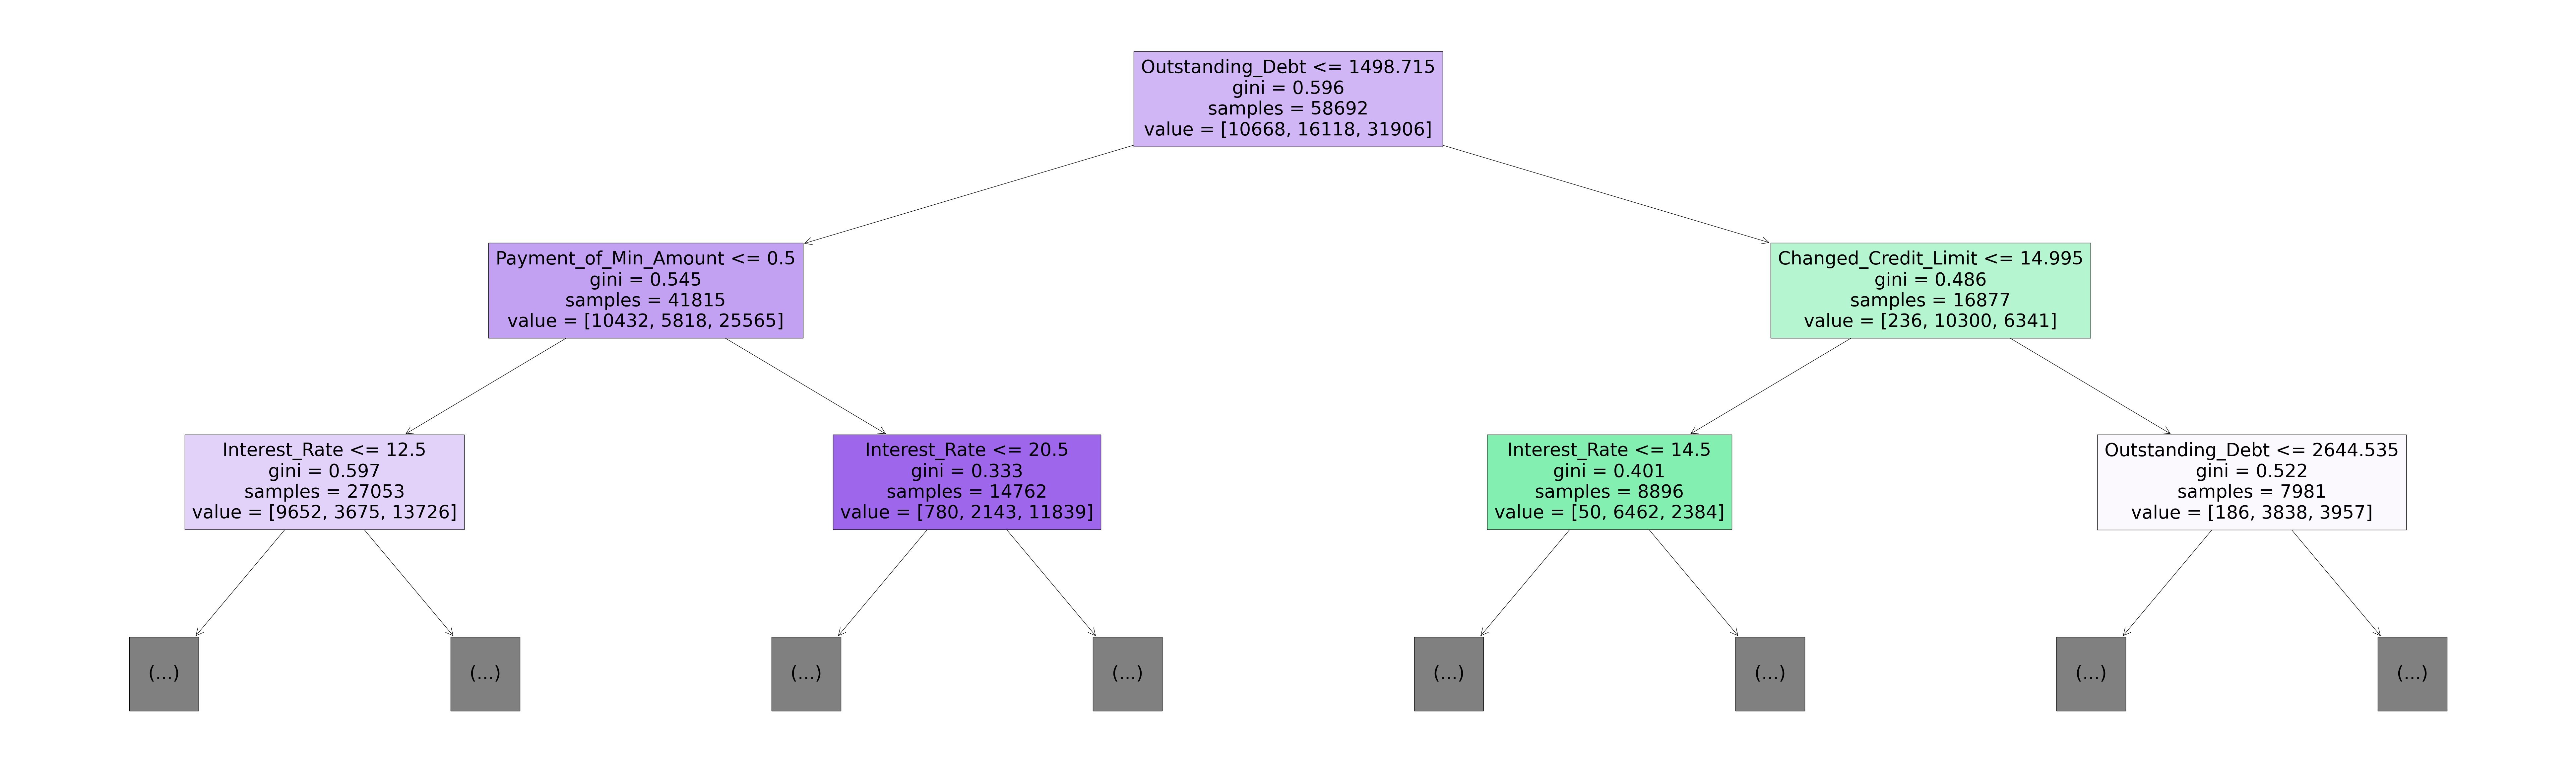

In [92]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(100,30))

plot_tree(dt, feature_names=X_train.columns, max_depth=2,filled=True);
plt.show()

## Hyperparameter Tuning For K-Nearest Neighbors

In [148]:
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,20)

for neighbor in neighbors:

    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

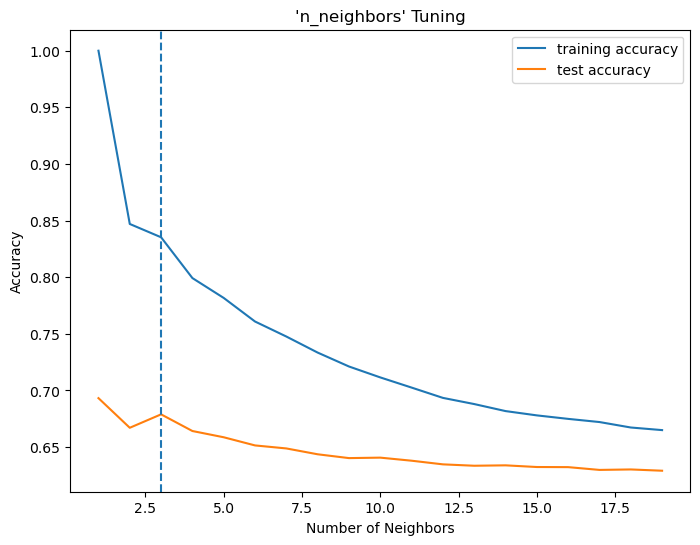

In [149]:
# Visualizing Model Complexity 
plt.figure(figsize=(8,6))
plt.title("'n_neighbors' Tuning")
plt.plot(neighbors, train_accuracies.values(), label="training accuracy"),
plt.plot(neighbors, test_accuracies.values(), label="test accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.axvline(x=3,linestyle="--")
plt.ylabel("Accuracy")
plt.show()

## Hyperparameter Tuning For Random Forest

### Tuning For 'n_estimators'

In [151]:
train_accuracies_rf={}
test_accuracies_rf={}

nestimate=np.arange(20,520,20)
for ns in nestimate:

    model_rf = RandomForestClassifier(n_estimators=ns, random_state = 24)
    model_rf.fit(X_train, y_train)
    
    train_accuracies_rf[ns] = model_rf.score(X_train,y_train)
    test_accuracies_rf[ns] = model_rf.score(X_test, y_test)

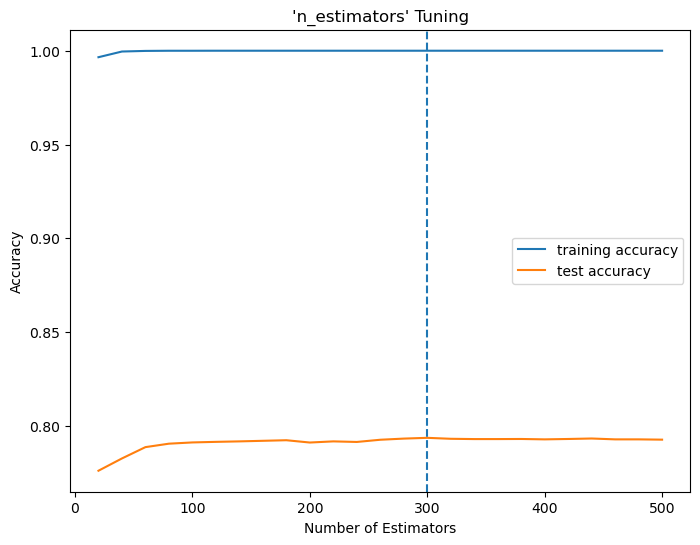

In [153]:
# Visualizing Model Complexity 
plt.figure(figsize=(8,6))
plt.title("'n_estimators' Tuning")
plt.plot(nestimate, train_accuracies_rf.values(), label="training accuracy"),
plt.plot(nestimate, test_accuracies_rf.values(), label="test accuracy")
plt.legend()
plt.xlabel("Number of Estimators")
plt.axvline(x=300,linestyle="--")
plt.ylabel("Accuracy")
plt.show()

### Tuning For max_features

In [160]:
model_rf_features = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features="log2", random_state = 24)
model_rf_features.fit(X_train, y_train)
    
print("Training Accuracy: {}".format(model_rf_features.score(X_train,y_train)))
print("Test Accuracy: {}".format(model_rf_features.score(X_test, y_test)))


Training Accuracy: 1.0

Test Accuracy: 0.7936516049887549
